# Plott der Parteien
- Alles anhand der Parteien sortieren
- Danach alle Mehrfachnennungen rausschmeissen
- Danach anschauen und anhand der Daten plotten.

In [1]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

import requests, zipfile, io #zum abspeichern von PDFs
from tqdm import tqdm # Anzeigen des aktuellen Ladestandes
import PyPDF2
import re
from os import listdir
from os.path import isfile, join
import locale
import matplotlib.pyplot as plt

In [2]:
df_tuti=pd.read_csv("KRFrames/df_tuti_Ganzes_Frame")

In [3]:
df_tuti[df_tuti["Geschäft"].str.contains("FDP")].shape

(44, 10)

In [4]:
df_tuti

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
0,0,3031,Interpellation der SVP-Fraktion betreffend Sic...,SVP-Fraktion,SVP,2019-11-26,3031-1-16191_Neutralitaet_Schulen.pdf,Direktion für Bildung und Kultur,Interpellation,/gast/geschaefte/2018
1,1,3030,Motion der SVP-Fraktion betreffend Stärkung de...,SVP-Fraktion,SVP,2019-11-26,3030-1-16190_Gewaltentrennung.pdf,NaN,Motion,/gast/geschaefte/2017
2,2,3029,Interpellation der Fraktion Alternative - die ...,Alternative,ALG,2019-11-24,3029-1-16189_Glencore.pdf,Volkswirtschaftsdirektion,Interpellation,/gast/geschaefte/2016
3,3,3026,Interpellation von Markus Spörri und Thomas Ga...,Thomas Gander,FDP,2019-11-15,3026-1-16186_Airbnb.pdf,Baudirektion,Interpellation,/gast/geschaefte/2013
4,4,3026,Interpellation von Markus Spörri und Thomas Ga...,Markus Spörri,FDP,2019-11-15,3026-1-16186_Airbnb.pdf,Baudirektion,Interpellation,/gast/geschaefte/2013
...,...,...,...,...,...,...,...,...,...,...
1798,1804,857,"Motion von Heinz Tännler, Karl Betschart und H...",Karl Betschart,SVP,2005-04-26,pdoc_880_1.pdf,NaN,Motion,/gast/geschaefte/1340
1799,1805,836,Interpellation von Käty Hofer Buser betreffend...,Käty Hofer Buser,SP,2002-12-03,pdoc_212_1.pdf,NaN,Interpellation,/gast/geschaefte/1339
1800,1806,810,Motion von Marcel Meyer betreffend Vergabe von...,Marcel Meyer,CVP,2002-08-13,pdoc_62_1.pdf,NaN,Motion,/gast/geschaefte/1335
1801,1807,801,Motion von Hans Abicht betreffend Raumkonzept ...,Hans Abicht,FDP,2006-08-22,pdoc_1440_1.pdf,NaN,Motion,/gast/geschaefte/1333


In [5]:
# Nun sortieren nach Parteien
df1=df_tuti.sort_values("P")
df1

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
1802,1808,304,Motion von Manuela Weichelt betreffend HIV-Prä...,Manuela Weichelt,ALG,2003-05-27,pdoc_50_1.pdf,NaN,Motion,/gast/geschaefte/1309
426,427,2668,Motion von Jolanda Spiess-Hegglin betreffend k...,Jolanda Spiess-Hegglin,ALG,2016-09-21,2668-1-15274_Kostenvorschuss.pdf,Sicherheitsdirektion,Motion,/gast/geschaefte/1654
425,426,2669,Motion von Jolanda Spiess-Hegglin betreffend P...,Jolanda Spiess-Hegglin,ALG,2016-09-21,2669-1-15275_proporzionale-Pers%C3%B6nlichkeit...,Direktion des Innern,Motion,/gast/geschaefte/1655
424,425,2671,Kleine Anfrage der Fraktion Alternative – die ...,Alternative,ALG,2016-08-31,2671-1-15279_Einstellungsverfahren.pdf,Finanzdirektion,Kleine Anfrage,/gast/geschaefte/1657
420,421,2679,Kleine Anfrage von Andreas Lustenberger und An...,Anastas Odermatt,ALG,2016-10-07,2679-1-15308__KA-EP2.pdf,Finanzdirektion,Kleine Anfrage,/gast/geschaefte/1671
...,...,...,...,...,...,...,...,...,...,...
564,565,2548,Interpellation von Willi Vollenweider und Phil...,Willi Vollenweider,pl,2015-09-04,2548-1-15012_Armee-Halbierung.pdf,Sicherheitsdirektion,Interpellation,/gast/geschaefte/1535
221,221,2858,Interpellation von Willi Vollenweider betreffe...,Willi Vollenweider,pl,2018-04-12,2858-1-15760_Schutz.pdf,Sicherheitsdirektion,Interpellation,/gast/geschaefte/1848
218,218,2861,"Interpellation von Susanne Giger, Jürg Messmer...",Willi Vollenweider,pl,2018-04-16,2861-1-15762_Fertigstellung-FMS.pdf,Baudirektion,Interpellation,/gast/geschaefte/1851
587,588,2512,Postulat von Willi Vollenweider betreffend Nei...,Willi Vollenweider,pl,2015-05-12,2512-1-14943_%C3%B6VKunden.pdf,Volkswirtschaftsdirektion,Postulat,/gast/geschaefte/1498


In [6]:
#Voila, denke das stimmt - es sind rund 800 Vorlagen weniger. Also mehr als ein Drittel weniger.
df2=df1.drop_duplicates(subset=['VorlageNR', 'P'], keep=False)

In [7]:
df2.tail(50)

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
345,345,2750,Kleine Anfrage von Manuel Brandenberg betreffe...,Manuel Brandenberg,SVP,2017-05-15,2750-1-15470_KA-Psychiatrische-Klinik.pdf,Gesundheitsdirektion,Kleine Anfrage,/gast/geschaefte/1748
349,349,2743,Motion der SVP-Fraktion betreffend Aufhebung d...,SVP-Fraktion,SVP,2017-05-04,2743-1-15441_Schulpsychologischer_Dienst.pdf,Direktion für Bildung und Kultur,Motion,/gast/geschaefte/1733
1214,1218,1744,Kleine Anfrage der SVP-Fraktion betreffend gen...,SVP-Fraktion,SVP,2008-11-04,12901.pdf,NaN,Kleine Anfrage,/gast/geschaefte/1273
350,350,2742,Motion der SVP-Fraktion betreffend transparent...,SVP-Fraktion,SVP,2017-05-03,2742-1-15438-Landesverweisungen.pdf,Obergericht,Motion,/gast/geschaefte/1732
1489,1495,1423,"Postulat von Karl Rust, Hans Peter Schlumpf, W...",Werner Villiger,SVP,2006-03-20,pdoc_1217_1.pdf,NaN,Postulat,/gast/geschaefte/1010
1484,1490,1427,Postulat der SVP-Fraktion betreffend Errichtun...,SVP-Fraktion,SVP,2006-04-03,pdoc_1232_1.pdf,NaN,Postulat,/gast/geschaefte/1014
378,378,2727,Interpellation von Philip C. Brunner betreffen...,Philip C. Brunner,SVP,2017-03-14,2727-1-15408_Fachstelle_Migration.pdf,Volkswirtschaftsdirektion,Interpellation,/gast/geschaefte/1715
380,380,2724,Kleine Anfrage von Philip C. Brunner betreffen...,Philip C. Brunner,SVP,2017-03-09,2724-1-15422_DI.pdf,Direktion des Innern,Kleine Anfrage,/gast/geschaefte/1718
382,382,2722,Interpellation von Philip C. Brunner betreffen...,Philip C. Brunner,SVP,2017-03-07,2722-1-15404_Fringe-Benefits.pdf,Finanzdirektion,Interpellation,/gast/geschaefte/1710
1469,1475,1459,Motion von René Bär betreffend Abschaffung des...,René Bär,SVP,2006-06-29,pdoc_1389_1.pdf,NaN,Motion,/gast/geschaefte/1043


In [8]:
df4=df2.set_index(pd.DatetimeIndex(df2["Einreichedatum"]))
                 


In [17]:
df5=df4.sort_index().head(1088)

In [15]:
df5.shape

(1100, 10)

In [18]:
#Hier die Anzahl Nennungen der einzelnen Parteien
df5["P"].value_counts()

CVP    237
SVP    217
ALG    215
SP     201
FDP    147
GLP     42
CSP     16
pl       8
SGA      5
Name: P, dtype: int64

In [19]:
df_pa=df5["P"]#ich versuchs mal mit nur den parteien und den Daten
df_pa

Einreichedatum
1982-12-16    SVP
1982-12-16    FDP
1982-12-16    CVP
1998-01-29    FDP
1998-10-27    SVP
             ... 
2019-11-06    GLP
2019-11-06    CVP
2019-11-24    ALG
2019-11-26    SVP
2019-11-26    SVP
Name: P, Length: 1088, dtype: object

In [52]:
# Nun gehts ans Plotten - mal schauen ob das geht. 

In [20]:
df_pa.resample("M").count()# das geht nicht - ist fast dasselbe wie bei der gesamtauswertung

Einreichedatum
1982-12-31    3
1983-01-31    0
1983-02-28    0
1983-03-31    0
1983-04-30    0
             ..
2019-07-31    7
2019-08-31    3
2019-09-30    3
2019-10-31    2
2019-11-30    5
Freq: M, Name: P, Length: 444, dtype: int64

# Die Ergebnisse der einzelnen Parteien
Jedoch noch einzeln

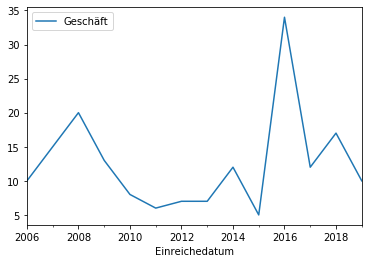

In [21]:
dfalg=df5[df5["P"].str.contains("ALG")]
dfalgz=dfalg[["Geschäft"]]
dfalgz["2006":].resample("A").count().plot()

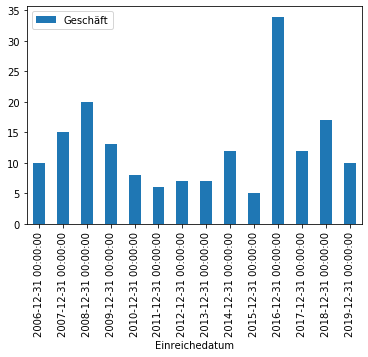

In [22]:
dfalgz["2006":].resample("A").count().plot(kind="bar")

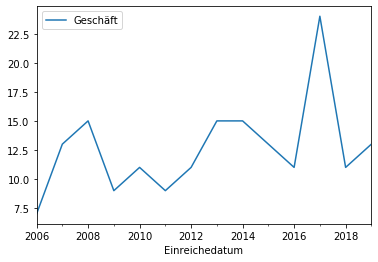

In [23]:
dfsvp=df5[df5["P"].str.contains("SVP")]
dfsvpz=dfsvp[["Geschäft"]]
dfsvpz["2006":].resample("A").count().plot()

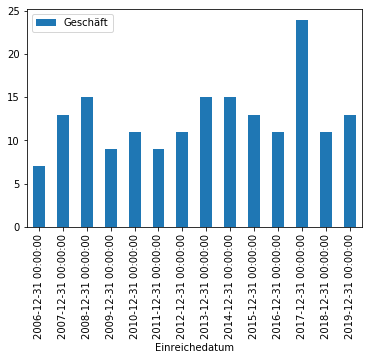

In [24]:
dfsvpz["2006":].resample("A").count().plot(kind="bar")

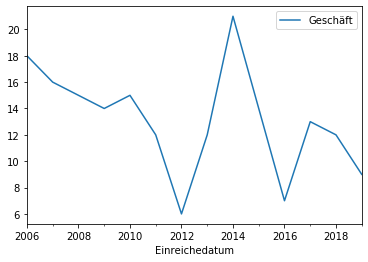

In [25]:
dfcvp=df5[df5["P"].str.contains("CVP")]
dfcvpz=dfcvp[["Geschäft"]]
dfcvpz["2006":].resample("A").count().plot()

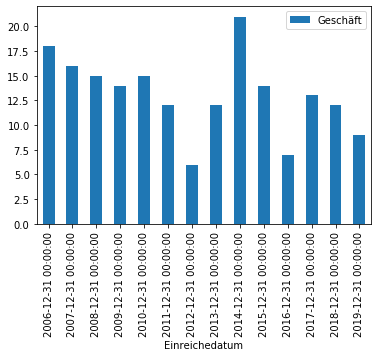

In [26]:
dfcvpz["2006":].resample("A").count().plot(kind="bar")

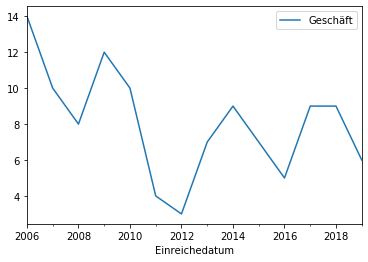

In [27]:
dffdp=df5[df5["P"].str.contains("FDP")]
dffdpz=dffdp[["Geschäft"]]
dffdpz["2006":].resample("A").count().plot()

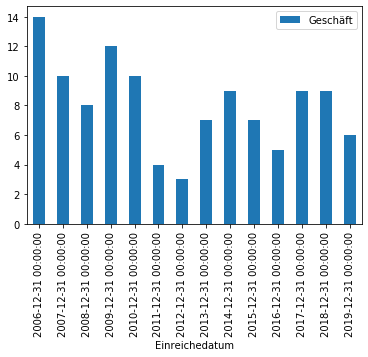

In [28]:
dffdpz["2006":].resample("A").count().plot(kind="bar")

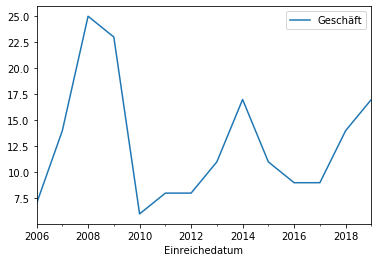

In [29]:
dfsp=df5[df5["P"].str.contains("SP")]
dfspz=dfsp[["Geschäft"]]
dfspz["2006":].resample("A").count().plot()

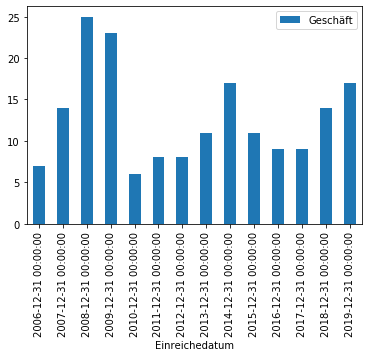

In [30]:
dfspz["2006":].resample("A").count().plot(kind="bar")

# Nun müsste ich diese zusammenführen
aber wie nur - geht es wenn ich die Frames einzeln abspeichere?

In [31]:
svp=dfsvpz["2005":].resample("A").count()
sp=dfspz["2005":].resample("A").count()
alg=dfalgz["2005":].resample("A").count()

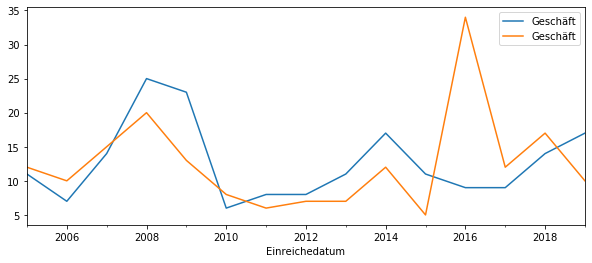

In [32]:
ax = sp.plot()
alg.plot(ax=ax, figsize=(10,4)) #zwei zusammen. ok vielleicht noch mit unstack

# Alle miteinander plotten
Dazu versuche ich die Parteien zu Columns zu machen und das Datum wieder als Zeile

In [33]:
# Ich versuche es mal mit en parteien einzeln
df_umgekehrt_m=df5.groupby("P").resample("M").count().unstack()
df_umgekehrt_q=df5.groupby("P").resample("Q").count().unstack()
df_umgekehrt_a=df5.groupby("P").resample("A").count().unstack()
df_umge=df_umgekehrt_a[["Unnamed: 0"]] #hier kann ich nun wähen welches DF. also wie resamplet

In [34]:
df_swi=df_umge.T #hier mache ich die Zeilen zu Spalten und umgekehrt.

In [35]:
df_swi.head(5)

P                          ALG  CSP  CVP  FDP  GLP  SGA  SP  SVP  pl
           Einreichedatum                                           
Unnamed: 0 1982-12-31      NaN  NaN  1.0  1.0  NaN  NaN NaN  1.0 NaN
           1983-12-31      NaN  NaN  0.0  0.0  NaN  NaN NaN  0.0 NaN
           1984-12-31      NaN  NaN  0.0  0.0  NaN  NaN NaN  0.0 NaN
           1985-12-31      NaN  NaN  0.0  0.0  NaN  NaN NaN  0.0 NaN
           1986-12-31      NaN  NaN  0.0  0.0  NaN  NaN NaN  0.0 NaN

In [36]:
df_swit=df_swi.reset_index(level=1)#ich muss irgendwie wieder den Datetime-Index haben
df_7=df_swit.set_index(pd.DatetimeIndex(df_swit["Einreichedatum"]))
df8=df_7.sort_index()

In [37]:
del df8 ["Einreichedatum"]
del df8 ["CSP"]
del df8 ["SGA"]

In [38]:
del df8 ["pl"]

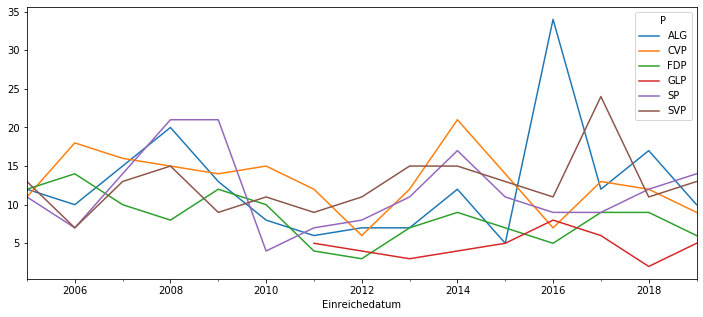

In [39]:
df8["2005":].plot(figsize=(12,5))

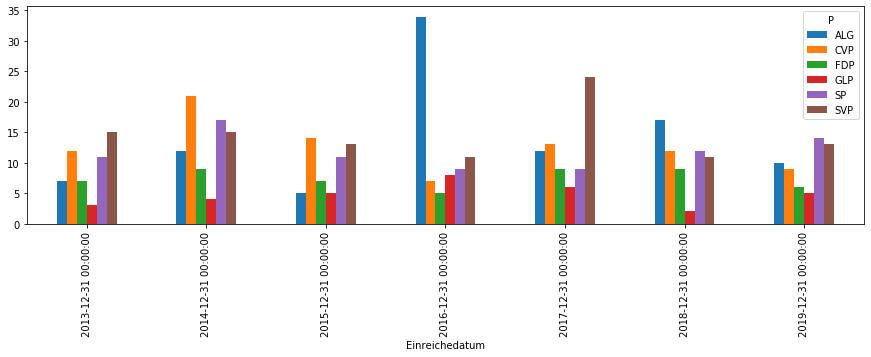

In [40]:
df8["2013":].plot(figsize=(15,4), kind="bar")

In [42]:
df_tuti.groupby("Namenganz").count().sort_values("Geschäft", ascending=False).head(20)

,Unnamed: 0,VorlageNR,Geschäft,P,Einreichedatum,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
Namenganz,,,,,,,,,
Alternative,101,101,101,101,99,101,34,101,101
SP-Fraktion,99,99,99,99,98,99,49,99,99
CVP-Fraktion,75,75,75,75,75,75,28,75,75
SVP-Fraktion,73,73,73,73,73,73,32,73,73
Philip C. Brunner,43,43,43,43,43,43,33,43,43
FDP-Fraktion,36,36,36,36,36,36,17,36,36
Thomas Lötscher,33,33,33,33,33,33,9,33,33
Alois Gössi,31,31,31,31,30,31,7,31,31
Andreas Hausheer,30,30,30,30,30,30,20,30,30
